In [2]:
import pandas as pd # Series, DataFrame, Panel
import numpy as np # Matrix, Vector, arrays
import matplotlib.pyplot as plt # visualizations (static, animated, interactive)
import seaborn as sns # data visualization
import statistics as stat

pd.set_option('display.float_format', lambda x: '%.3f' % x) # it helps us avoid scientific notation
sns.set_style('darkgrid')

In order to read a file that we have saved on our computer we use pandas. It has the necessary attributes to manage tables.

In [3]:
# Read file
data = pd.read_csv('/Users/santiago/Downloads/annual-enterprise-survey-2023-financial-year-provisional.csv')
data

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,NaN,Level 1,99999,All industries,Dollars (millions),H01,Total income,Financial performance,930995,ANZSIC06 divisions A-S (excluding classes K633...
1,2023.000,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,821630,ANZSIC06 divisions A-S (excluding classes K633...
2,2023.000,Level 1,99999,All industries,Dollars (millions),NaN,"Interest, dividends and donations",Financial performance,84354,ANZSIC06 divisions A-S (excluding classes K633...
3,2023.000,Level 1,99999,All industries,Dollars (millions),NaN,Non-operating income,Financial performance,25010,ANZSIC06 divisions A-S (excluding classes K633...
4,2023.000,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,832964,ANZSIC06 divisions A-S (excluding classes K633...
...,...,...,...,...,...,...,...,...,...,...
17490,2020.000,Level 1,MN,"Professional, Scientific, Technical, Administr...",Dollars (millions),H01,Total income,Financial performance,59972,ANZSIC06 divisions M and N
17491,2020.000,Level 1,MN,"Professional, Scientific, Technical, Administr...",Dollars (millions),H04,Sales of goods and services,Financial performance,55029,ANZSIC06 divisions M and N
17492,2020.000,Level 1,MN,"Professional, Scientific, Technical, Administr...",Dollars (millions),H05,"Interest, dividends and donations",Financial performance,3451,ANZSIC06 divisions M and N
17493,2020.000,Level 1,MN,"Professional, Scientific, Technical, Administr...",Dollars (millions),H06,"Government funding, grants and subsidies",Financial performance,457,ANZSIC06 divisions M and N


In [4]:
# Get the shape of the data we've read
data.shape

(17495, 10)

In [5]:
data.dtypes

Year                           float64
Industry_aggregation_NZSIOC     object
Industry_code_NZSIOC            object
Industry_name_NZSIOC            object
Units                           object
Variable_code                   object
Variable_name                   object
Variable_category               object
Value                           object
Industry_code_ANZSIC06          object
dtype: object

In [6]:
# the method isna() is going to return a same-sized table indicating if the value in the original data is NaN
# the chained sum() method will tell us how many NaN values there are in each category
data.isna().sum()

Year                           10
Industry_aggregation_NZSIOC     0
Industry_code_NZSIOC            3
Industry_name_NZSIOC            0
Units                           0
Variable_code                   2
Variable_name                   0
Variable_category               0
Value                           0
Industry_code_ANZSIC06          0
dtype: int64

In the real world, NaN values ​​can be a problem because getting information is difficult. When there are a small number of NaN values, the best practice is to remove them, since **inputting** them can skew the information a bit because we are guessing at the real values. This practice depends on the amount of information we have; removing NaN data when we don't have enough information could take away even more information.

The more data we have, the better

In [7]:
# dropna return the data without the rows that cointain at least one NaN value
# if we look carefully, the index is not reset, we must reset it to avoid problems with loops
data_without_NaN = data.dropna()
data_without_NaN

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
1,2023.000,Level 1,99999,All industries,Dollars (millions),H04,"Sales, government funding, grants and subsidies",Financial performance,821630,ANZSIC06 divisions A-S (excluding classes K633...
4,2023.000,Level 1,99999,All industries,Dollars (millions),H08,Total expenditure,Financial performance,832964,ANZSIC06 divisions A-S (excluding classes K633...
7,2023.000,Level 1,99999,All industries,Dollars (millions),H11,Depreciation,Financial performance,30814,ANZSIC06 divisions A-S (excluding classes K633...
9,2023.000,Level 1,99999,All industries,Dollars (millions),H13,Redundancy and severance,Financial performance,269,ANZSIC06 divisions A-S (excluding classes K633...
10,2023.000,Level 1,99999,All industries,Dollars (millions),H14,Salaries and wages to self employed commission...,Financial performance,1639,ANZSIC06 divisions A-S (excluding classes K633...
...,...,...,...,...,...,...,...,...,...,...
17490,2020.000,Level 1,MN,"Professional, Scientific, Technical, Administr...",Dollars (millions),H01,Total income,Financial performance,59972,ANZSIC06 divisions M and N
17491,2020.000,Level 1,MN,"Professional, Scientific, Technical, Administr...",Dollars (millions),H04,Sales of goods and services,Financial performance,55029,ANZSIC06 divisions M and N
17492,2020.000,Level 1,MN,"Professional, Scientific, Technical, Administr...",Dollars (millions),H05,"Interest, dividends and donations",Financial performance,3451,ANZSIC06 divisions M and N
17493,2020.000,Level 1,MN,"Professional, Scientific, Technical, Administr...",Dollars (millions),H06,"Government funding, grants and subsidies",Financial performance,457,ANZSIC06 divisions M and N


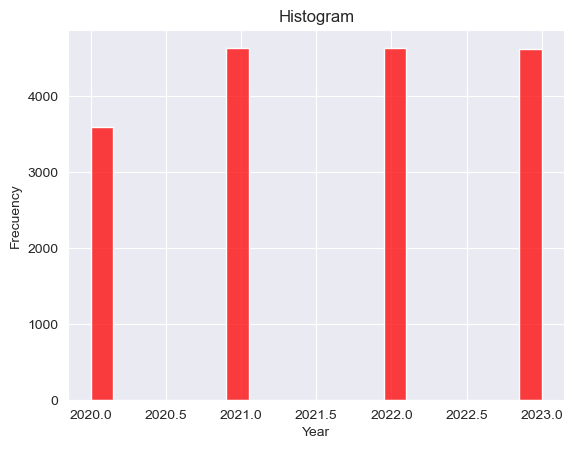

In [8]:
plt.figure()
sns.histplot(data_without_NaN['Year'], color = 'red')
plt.title('Histogram')
plt.xlabel('Year')
plt.ylabel('Frecuency')
plt.show()

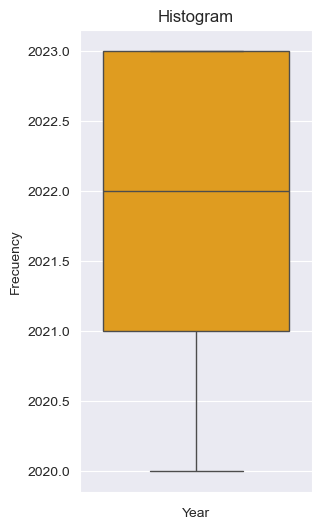

In [10]:
plt.figure(figsize = (3, 6))
sns.boxplot(data_without_NaN['Year'], color = 'orange')
plt.title('Histogram')
plt.xlabel('Year')
plt.ylabel('Frecuency')
plt.show()

# if we see a small circle on the pivot above, this means an outlier

# ---
#  º  outlier
#  |
# --- cuantil 75%
# --- cuantil 50%
# --- cuantil 25%
#  |
# ---